In [1]:
import numpy as np
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [8]:
df = pd.read_csv('../9.1 DATA/train (1).csv',usecols=['Age','Fare','Survived'])

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(714, 3)

In [11]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
x_train.shape

(571, 2)

In [15]:
clf = DecisionTreeClassifier()

In [16]:
clf.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [17]:
y_pred = clf.predict(x_test)

In [18]:
accuracy_score(y_test,y_pred)

0.6223776223776224

In [19]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6373043818466353

In [20]:
# Encoding Numerical features

In [21]:
kbins_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform')
kbins_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform')

In [22]:
trf = ColumnTransformer([
    ('trf1',kbins_age,[0]),
    ('trf2',kbins_fare,[1])
    ])

In [23]:
x_train_trf1 = trf.fit_transform(x_train)
x_test_trf1 = trf.transform(x_test)

In [24]:
# We can use 'n_bins_' to see the total bins created for each feature
# And 'bin_edges_' to see the edges of each bin

In [25]:
trf.named_transformers_['trf1'].n_bins_

array([10])

In [26]:
trf.named_transformers_['trf1'].bin_edges_

array([array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
              64.084, 72.042, 80.   ])                                       ],
      dtype=object)

In [27]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf1[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf1[:,1]
})

In [28]:
output['age_labels'] = pd.cut(x=x_train['Age'],
                              bins = trf.named_transformers_['trf1'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'],
                              bins = trf.named_transformers_['trf2'].bin_edges_[0].tolist())

In [29]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
700,18.0,2.0,227.5250,4.0,"(16.336, 24.294]","(204.932, 256.165]"
390,36.0,4.0,120.0000,2.0,"(32.252, 40.21]","(102.466, 153.699]"
117,29.0,3.0,21.0000,0.0,"(24.294, 32.252]","(0.0, 51.233]"
268,58.0,7.0,153.4625,2.0,"(56.126, 64.084]","(102.466, 153.699]"
102,21.0,2.0,77.2875,1.0,"(16.336, 24.294]","(51.233, 102.466]"


In [30]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf1,y_train)
y_pred = clf.predict(x_test_trf1)
accuracy_score(y_test,y_pred)

0.6783216783216783

In [31]:
x_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x_trf,y,cv=10,scoring='accuracy'))

0.6864632237871675

In [32]:
def discretize(bins,strategy):
    kbins_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbins_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('trf1',kbins_age,[0]),
        ('trf2',kbins_fare,[1])
        ])
    
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x_trf,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('Age Distribution Before Binning')
    
    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title('Age Distribution After Binning')
    
    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title('Fare Distribution Before Binning')
    
    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title('Fare Distribution After Binning')
    
    plt.show()

c:\Users\godsc\anaconda3\envs\profiling_env\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
c:\Users\godsc\anaconda3\envs\profiling_env\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


0.682140062597809


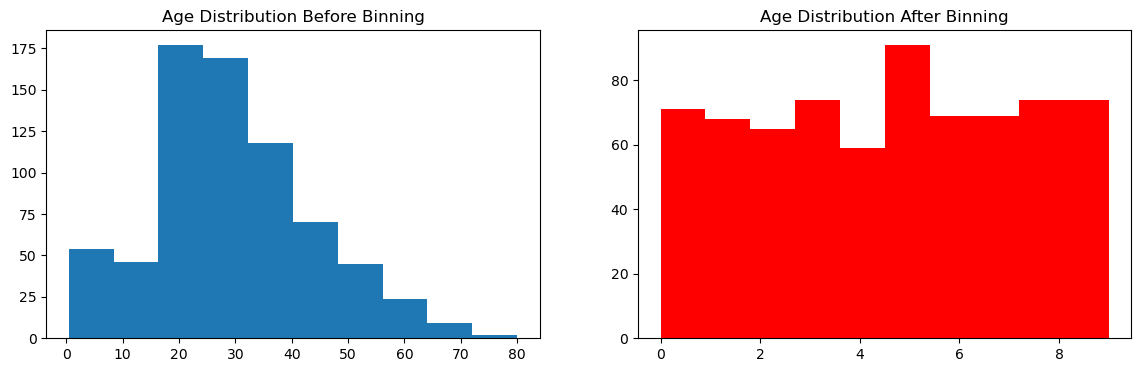

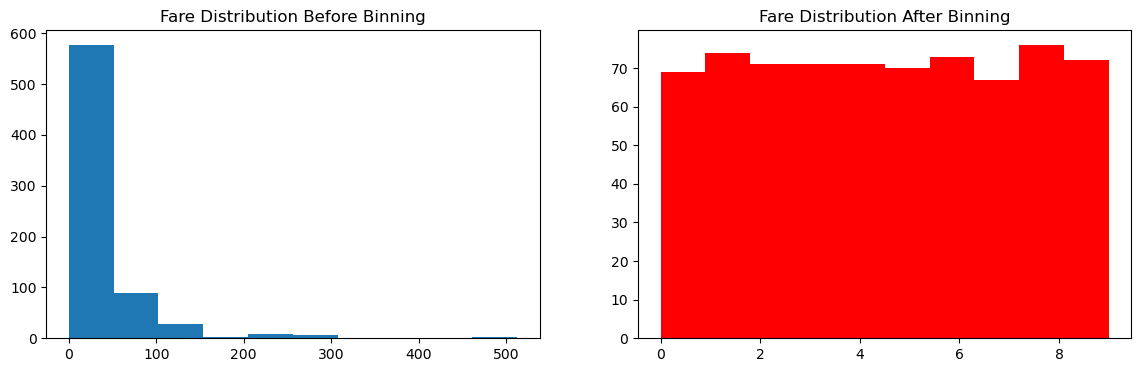

In [34]:
discretize(10,'quantile')

c:\Users\godsc\anaconda3\envs\profiling_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\godsc\anaconda3\envs\profiling_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.6723982785602504


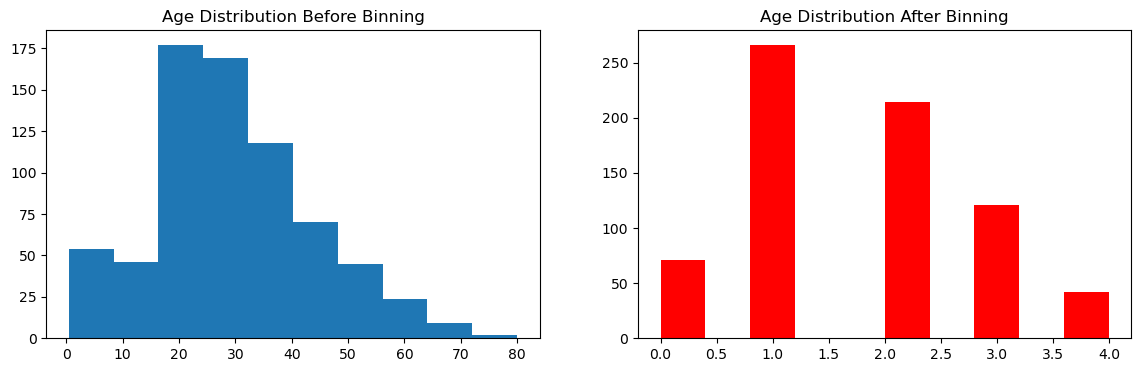

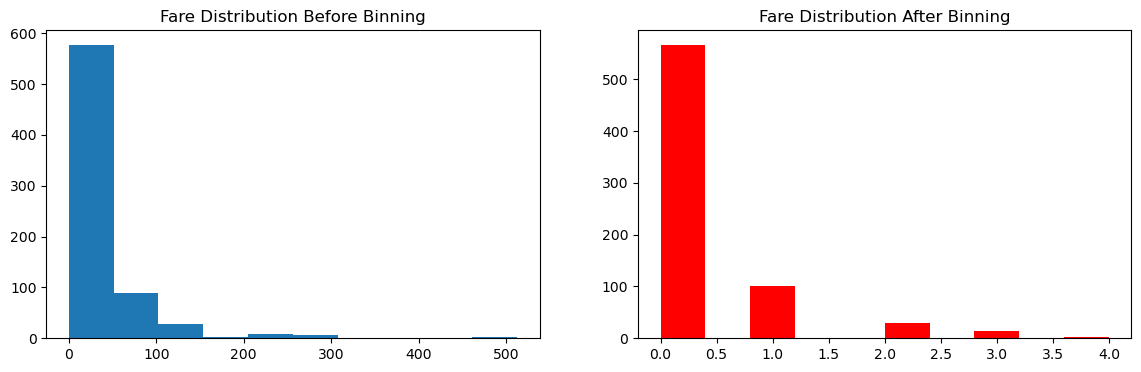

In [35]:
discretize(5,'kmeans')